In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import re

# A faire : séparer HDD et SSD et storage type SSD et HDD pour prix qui soit positivement corrélé ?
# Séparer cpou freq ?

## Partie 1 : Nettoyage et quantification du dataset

### Ouverture

In [2]:
laptop_data = pd.read_csv('laptops.csv', sep=",", encoding='latin1')

In [3]:
laptop_data.head(22)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00"
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97"
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"1158,70"
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00"
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00"


In [4]:
laptop_data2 = laptop_data.copy()

In [5]:
laptop_data2['ssd_size'] = laptop_data2[' Storage'].str.extract('(\d+)GB SSD')
laptop_data2['hdd_size'] = laptop_data2[' Storage'].str.extract('(\d+)GB HDD')
laptop_data2['flash_size'] = laptop_data2[' Storage'].str.extract('(\d+)GB Flash Storage')

ssdhdd = laptop_data2[' Storage'].str.extract('(\d+)GB SSD \+ (\d+)TB HDD')
ssdhdd.columns = ['ssd_size', 'hdd_size']
laptop_data2['ssd_size2'] = laptop_data2['ssd_size'].fillna(ssdhdd['ssd_size'])
laptop_data2['hdd_size2'] = laptop_data2['hdd_size'].fillna(ssdhdd['hdd_size'])

In [6]:
laptop_data2.head(22)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),ssd_size,hdd_size,flash_size,ssd_size2,hdd_size2
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",128,NaN,NaN,128,NaN
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",NaN,NaN,128,NaN,NaN
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",256,NaN,NaN,256,NaN
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",512,NaN,NaN,512,NaN
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",256,NaN,NaN,256,NaN
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00",NaN,500,NaN,NaN,500
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97",NaN,NaN,256,NaN,NaN
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"1158,70",NaN,NaN,256,NaN,NaN
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00",512,NaN,NaN,512,NaN
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00",256,NaN,NaN,256,NaN


In [7]:
laptop_data.shape

(1303, 13)

In [8]:
laptop_data.dtypes

Manufacturer                object
Model Name                  object
Category                    object
Screen Size                 object
Screen                      object
CPU                         object
RAM                         object
 Storage                    object
GPU                         object
Operating System            object
Operating System Version    object
Weight                      object
Price (Euros)               object
dtype: object

In [9]:
laptop_data.loc[13]

Manufacturer                                    Dell
Model Name                             Inspiron 3567
Category                                    Notebook
Screen Size                                    15.6"
Screen                             Full HD 1920x1080
CPU                         Intel Core i3 6006U 2GHz
RAM                                              4GB
 Storage                                   256GB SSD
GPU                               AMD Radeon R5 M430
Operating System                             Windows
Operating System Version                          10
Weight                                         2.2kg
Price (Euros)                                 498,90
Name: 13, dtype: object

#### Suppression des colones inexploitables

In [10]:
#Suppression des colonnes inexploitables
laptop_data = laptop_data.drop('Model Name', axis=1)
laptop_data = laptop_data.drop('Operating System Version', axis=1) 

laptop_data.rename(columns = {'Screen Size':'ScreenSize'}, inplace = True) # Suppression de l'espace dans le nom

laptop_data['Price (Euros)'] = laptop_data['Price (Euros)'].str.replace(',', '.').astype('float64') # Conversion des prix en float64

## Partie 2 : Quantification du dataset

In [11]:
laptop_data_quantified = laptop_data.copy()

#### On attribue un nombre à chaque ligne de certaines colonnes

In [12]:
print((laptop_data_quantified['Category'].unique()))

laptop_data_quantified.Category[laptop_data_quantified.Category == 'Ultrabook'] = 1
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Notebook'] = 2
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Netbook'] = 3
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Gaming'] = 4
laptop_data_quantified.Category[laptop_data_quantified.Category == '2 in 1 Convertible'] = 5
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Workstation'] = 6

laptop_data_quantified.rename(columns = {'Operating System':'OperatingSystem'}, inplace = True)
print((laptop_data_quantified['OperatingSystem'].unique()))

laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'macOS'] = 1
laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'No OS'] = 2
laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'Windows'] = 3
laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'Mac OS'] = 4
laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'Linux'] = 5
laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'Android'] = 6
laptop_data_quantified.OperatingSystem[laptop_data_quantified.OperatingSystem== 'Chrome OS'] = 7

print((laptop_data_quantified['Manufacturer'].unique()))

laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Apple'] = 1
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'HP'] = 2
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Acer'] = 3
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Asus'] = 4
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Dell'] = 5
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Lenovo'] = 6
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Chuwi'] = 7
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'MSI'] = 8
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Microsoft'] = 9
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Toshiba'] = 10
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Huawei'] = 11
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Xiaomi'] = 12
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Vero'] = 13
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Razer'] = 14
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Mediacom'] = 15
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Samsung'] = 16
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Google'] = 17
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Fujitsu'] = 18
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'LG'] = 19

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
['macOS' 'No OS' 'Windows' 'Mac OS' 'Linux' 'Android' 'Chrome OS']
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


C:\Users\Louis\AppData\Local\Temp\ipykernel_2276\578374523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data_quantified.Category[laptop_data_quantified.Category == 'Ultrabook'] = 1
C:\Users\Louis\AppData\Local\Temp\ipykernel_2276\578374523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data_quantified.Category[laptop_data_quantified.Category == 'Notebook'] = 2
C:\Users\Louis\AppData\Local\Temp\ipykernel_2276\578374523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

#### Méthode moins laborieuse pour la suite de la quantification (plus de 100 CPU et GPU différents)

In [13]:
# En gros on met la lists de tous les CPU et les GPU dans une variable et on crée un dictionnaire vide. 
# Ensuite, la boucle va remplacer chaque CPU et GPU par un nombre dans le dictionnaire.
# Après on remplace les colonnes CPU et GPU dans notre dataset par leur nouvelle valeur numérique.

gpu_mapping = {} 
gpu = laptop_data_quantified['GPU'].unique()
cpu_mapping = {}
cpu = laptop_data_quantified['CPU'].unique()

for i, gpu in enumerate(gpu, start=1):
    #print(gpu, "=", i) # Pour le test : afficher quel GPU correspond à quel nombre
    gpu_mapping[gpu] = i

for i, cpu in enumerate(cpu, start=1):
    #print(cpu, "=", i)
    cpu_mapping[cpu] = i

laptop_data_quantified['GPU'] = laptop_data_quantified['GPU'].map(gpu_mapping)

laptop_data_quantified['CPU'] = laptop_data_quantified['CPU'].map(cpu_mapping)

#### Transformation de certaines colones

In [14]:
#On supprime les unités à la fin de la colone Weight, Screen Size et RAM
laptop_data_quantified['Weight'] = laptop_data_quantified['Weight'].str.replace('kg', '').str.replace('s', '').astype(float)
laptop_data_quantified['ScreenSize'] = laptop_data_quantified['ScreenSize'].str.replace('"', '').astype(float)
laptop_data_quantified['RAM'] = laptop_data_quantified['RAM'].str.replace('GB', '').str.replace('s', '').astype(float)

#Pour la colone ScreenSize, on supprime tout ce qu'il y a avant la taille avec re (module d'expressions régulières)
laptop_data_quantified['Screen'] = laptop_data_quantified['Screen'].apply(lambda x: re.findall('\d{4}x\d{4}|\d{4}x\d{3}', x)[0] if isinstance(x, str) else x)
#Ensuite on sépare la première taille de la deuxième
laptop_data_quantified['Screen'] = laptop_data_quantified['Screen'].str.split('x', n=1)
#Ensuite on fait la multiplication afin d'avoir un seul chiffre
laptop_data_quantified['Screen'] = laptop_data_quantified['Screen'].apply(lambda x: int(x[0]) * int(x[1]) if isinstance(x, list) and len(x) == 2 else x)

### Quantification du stockage

In [15]:
print (laptop_data_quantified[' Storage'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '1GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '512GB SSD +  1TB Hybrid' '256GB SSD +  1TB Hybrid']


In [16]:
laptop_data_quantified[' StorageType'] = laptop_data_quantified[' Storage'].str.replace('.*GB', '', regex=True)
print (laptop_data_quantified[' StorageType'].unique())

[' SSD' ' Flash Storage' ' HDD' '1TB HDD' ' SSD +  1TB HDD'
 ' SSD +  2TB HDD' '2TB HDD' '1TB Hybrid' '1TB SSD'
 ' Flash Storage +  1TB HDD' '1TB HDD +  1TB HDD' '1TB SSD +  1TB HDD'
 ' Hybrid' ' SSD +  1TB Hybrid']


In [17]:
storagetype_mapping = {} 
storagetype = laptop_data_quantified[' StorageType'].unique()

for i, storage in enumerate(storagetype, start=1):
    storagetype_mapping[storage] = i

laptop_data_quantified[' StorageType'] = laptop_data_quantified[' StorageType'].map(storagetype_mapping)

print (laptop_data[' Storage'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '1GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '512GB SSD +  1TB Hybrid' '256GB SSD +  1TB Hybrid']


In [18]:
Storage_mapping = {
    '256GB SSD': 256,
    '1TB HDD': 1000,
    '500GB HDD': 500,
    '512GB SSD': 512,
    '128GB SSD +  1TB HDD': 128 + 1000,
    '128GB SSD': 128,
    '256GB SSD +  1TB HDD': 256 + 1000,
    '32GB Flash Storage': 32,
    '2TB HDD': 2000,
    '64GB Flash Storage': 64,
    '512GB SSD +  1TB HDD': 512 + 1000,
    '1TB SSD': 1000,
    '256GB SSD +  2TB HDD': 256 + 2000,
    '1TB Hybrid': 1000,
    '256GB Flash Storage': 256,
    '16GB Flash Storage': 16,
    '32GB SSD': 32,
    '1GB SSD': 1,
    '128GB Flash Storage': 128,
    '512GB SSD +  2TB HDD': 512 + 2000,
    '16GB SSD': 16,
    '128GB SSD +  2TB HDD': 128 + 2000,
    '1TB SSD +  1TB HDD': 1000 + 1000,
    '256GB SSD +  500GB HDD': 256 + 500,
    '512GB Flash Storage': 512,
    '256GB SSD +  256GB SSD': 256 + 256,
    '512GB SSD +  512GB SSD': 512 + 512,
    '8GB SSD': 8,
    '64GB Flash Storage +  1TB HDD': 64 + 1000,
    '256GB SSD +  1TB Hybrid': 256 + 1000,
    '128GB HDD': 128,
    '1TB HDD +  1TB HDD': 1000 + 1000,
    '240GB SSD': 240,
    '32GB HDD': 32,
    '64GB SSD': 64,
    '512GB SSD +  1TB Hybrid': 512 + 1000,
    '508GB Hybrid': 508,
    '512GB SSD +  256GB SSD': 512 + 256
}

laptop_data_quantified[' Storage'] = laptop_data_quantified[' Storage'].replace(Storage_mapping)

In [19]:
laptop_data_quantified.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,Price (Euros),StorageType
0,1,1,13.3,4096000,1,8.0,128,1,1,1.37,1339.69,1
1,1,1,13.3,1296000,2,8.0,128,2,1,1.34,898.94,2
2,2,2,15.6,2073600,3,8.0,256,3,2,1.86,575.00,1
3,1,1,15.4,5184000,4,16.0,512,4,1,1.83,2537.45,1
4,1,1,13.3,4096000,5,8.0,256,5,1,1.37,1803.60,1


# Partie 2 : Analyse exploratoire de données

In [20]:
laptop_data["Price (Euros)"].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price (Euros), dtype: float64

C:\Users\Louis\AppData\Local\Temp\ipykernel_2276\3571809138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_data_quantified['Price (Euros)'])


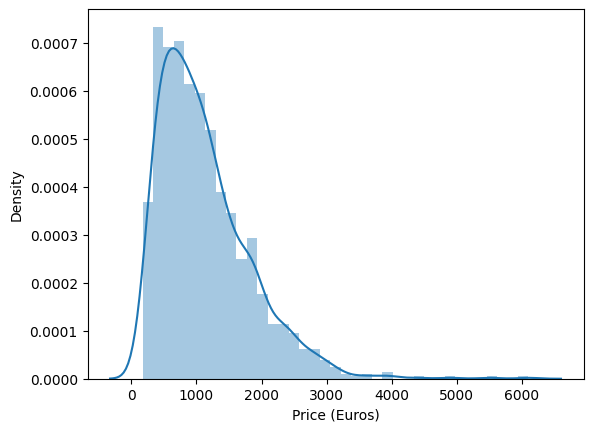

In [21]:
sns.distplot(laptop_data_quantified['Price (Euros)'])
plt.show()

In [22]:
plt.show()

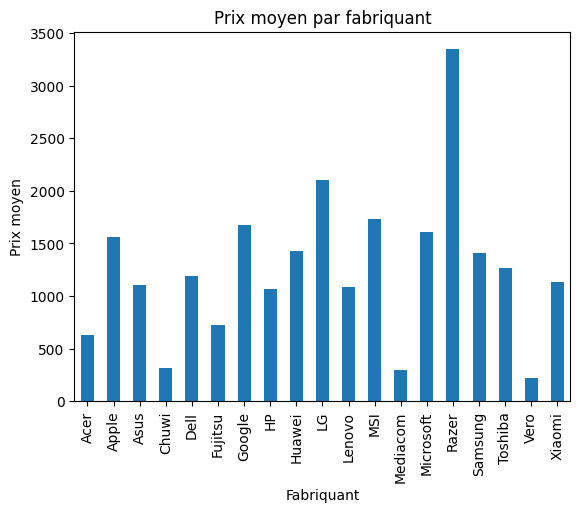

In [23]:
# Regroupement des données par fabriquant et calcul du prix moyen pour chacun
manufacturer_mean_price = laptop_data.groupby('Manufacturer')['Price (Euros)'].mean()

manufacturer_mean_price.plot(kind='bar')
plt.xlabel('Fabriquant')
plt.ylabel('Prix moyen')
plt.title('Prix moyen par fabriquant')
plt.show()

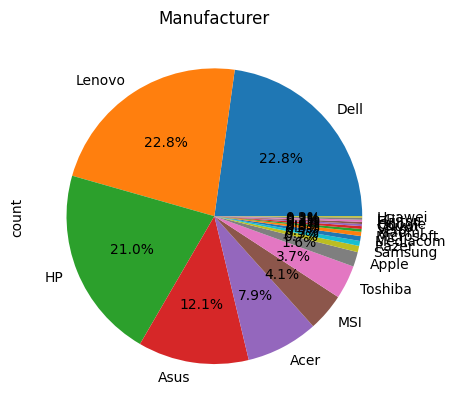

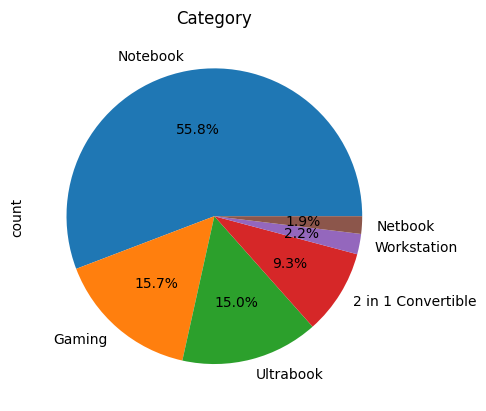

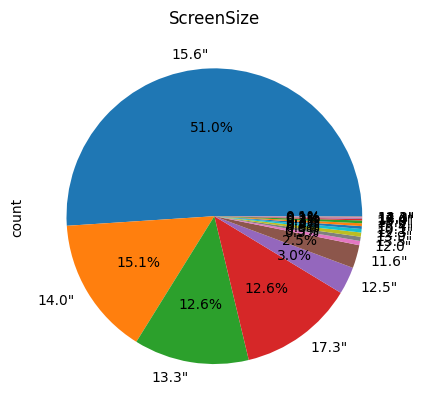

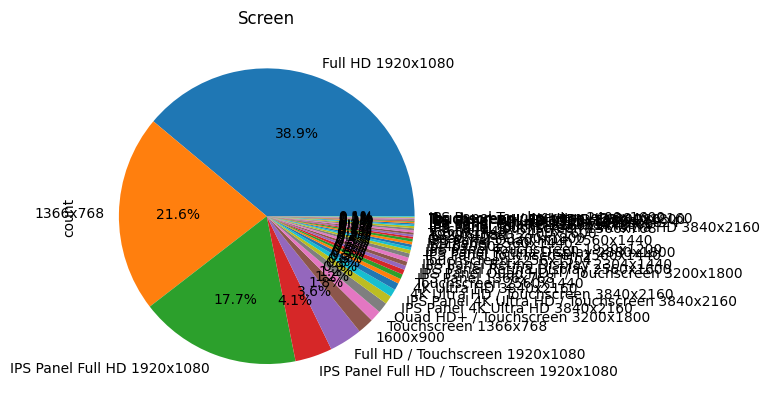

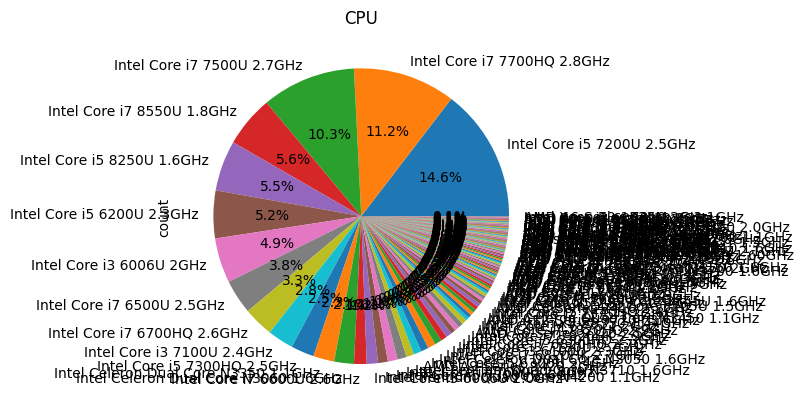

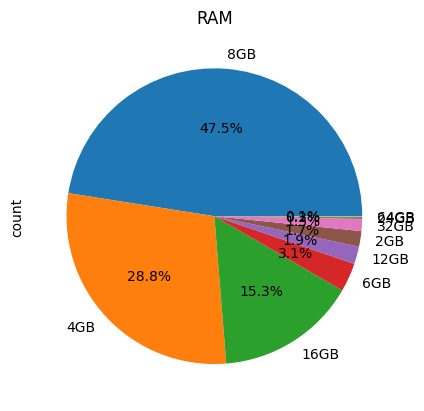

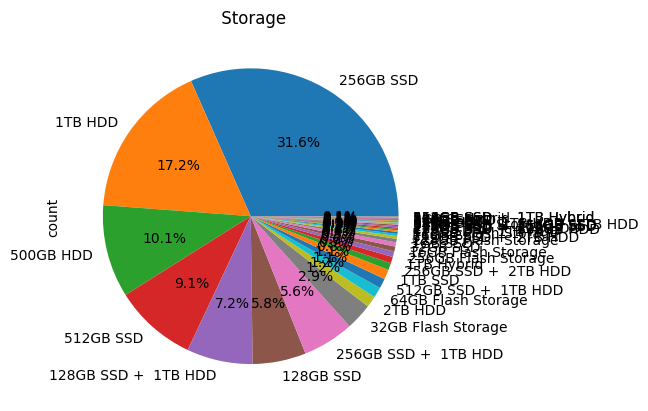

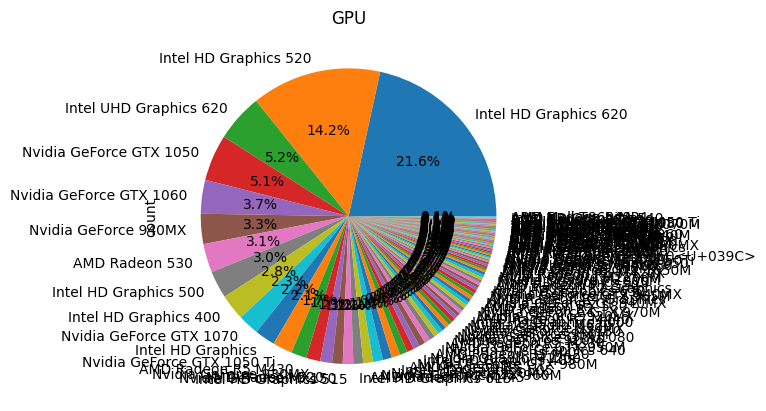

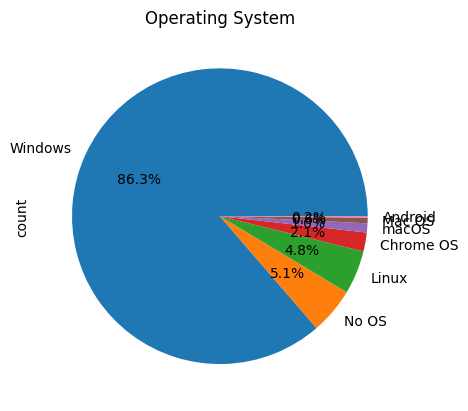

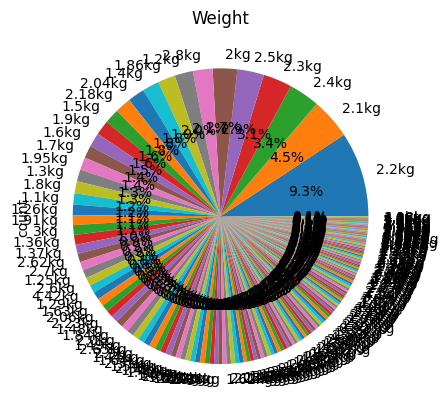

In [24]:
for column in laptop_data.columns:
   if column != 'Price (Euros)'  and column != 'ID':
      laptop_data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
      plt.title(column)
      plt.show()

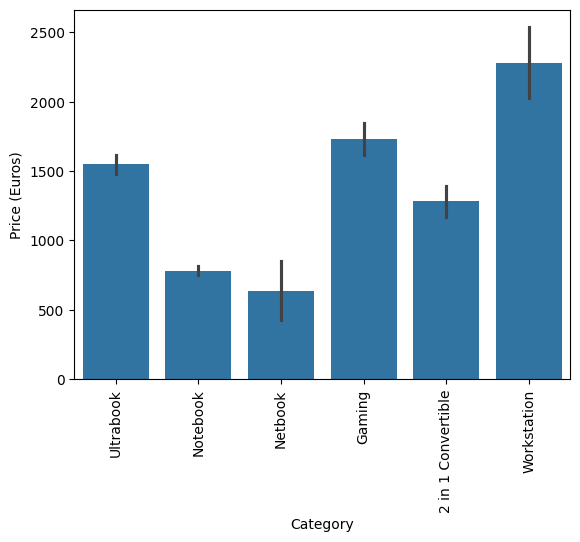

In [25]:
#data['TypeName'].value_counts().plot(kind='bar')
sns.barplot(x=laptop_data['Category'], y=laptop_data_quantified['Price (Euros)'])
plt.xticks(rotation="vertical")
plt.show()

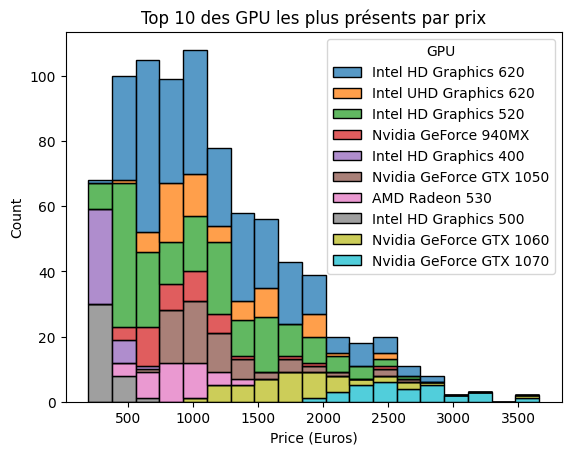

In [26]:
# Séparation du top 10 des GPU (sinon le graphique est illisible)
top_10_gpus = laptop_data['GPU'].value_counts().head(10).index.tolist()

# Nouveau dataframe avec uniquement les 10 GPU les plus fréquents
laptop_data_top_10_gpus = laptop_data[laptop_data['GPU'].isin(top_10_gpus)]

sns.histplot(data=laptop_data_top_10_gpus, x='Price (Euros)', hue='GPU', multiple='stack')
plt.title('Top 10 des GPU les plus présents par prix')
plt.show()

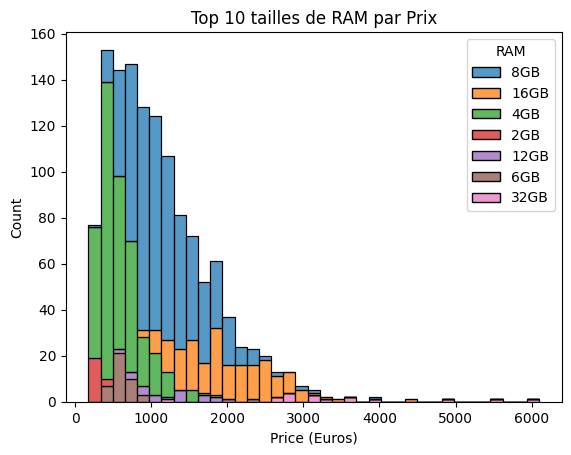

In [27]:
#Pareil pour la RAM
ram_counts = laptop_data['RAM'].value_counts()

laptop_data_filtered_ram = laptop_data[laptop_data['RAM'].isin(ram_counts[ram_counts >= 10].index)]

sns.histplot(data=laptop_data_filtered_ram, x='Price (Euros)', hue='RAM', multiple='stack')
plt.title('Top 10 tailles de RAM par Prix')
plt.show()

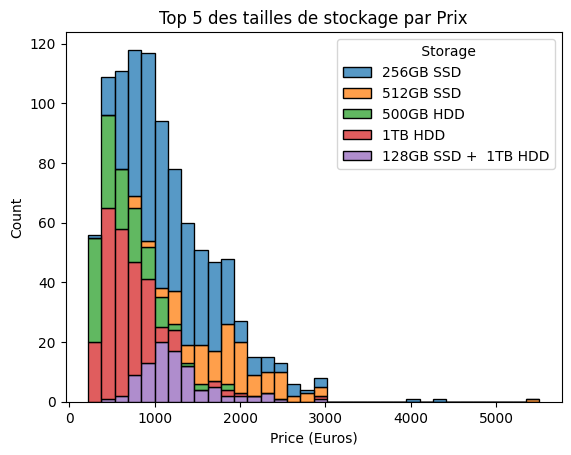

In [28]:
# Pareil pour le stockage
storage_counts = laptop_data[' Storage'].value_counts()

top_5_storage = storage_counts.head(5).index.tolist()
laptop_data_filtered_storage = laptop_data[laptop_data[' Storage'].isin(top_5_storage)]

sns.histplot(data=laptop_data_filtered_storage, x='Price (Euros)', hue=' Storage', multiple='stack')
plt.title('Top 5 des tailles de stockage par Prix')
plt.show()

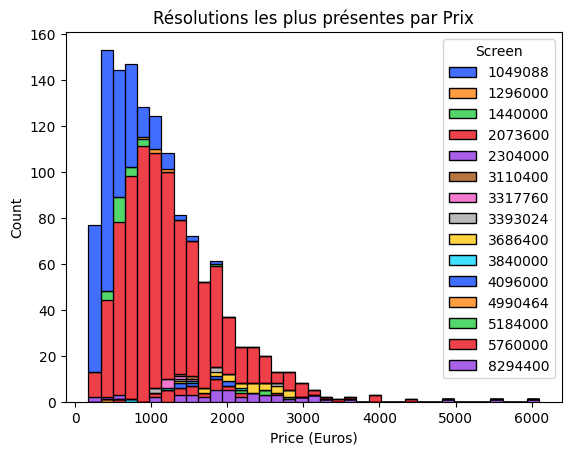

In [29]:
sns.histplot(data=laptop_data_quantified, x='Price (Euros)', hue='Screen', multiple='stack', palette='bright')
plt.title('Résolutions les plus présentes par Prix')
plt.show()

On constate déjà que la majorité des ordinateurs sont des notebooks. Ensuite, nous avons 15% d'ordinateurs de jeu, 15% d'Ultrabook, 10% d'ordinateurs convertibles et une minorité de Workstations et de Netbook.
Le prix moyen des ordinateurs est de 1123€ avec une médiane à 977€.

Au niveau des prix moyens par rapport au constructeur, on constate que Razer est de loin la marque la plus chère, normal puisque c'est une marque d'ordinateurs de jeu, nécéssitant les composants les plus chers. Nous avons ensuite les PC de LG et de MSI/Google. Les ordinateurs les moins chers du lot sont les Chuwi, les Mediacom et les Vero.

Au niveau de la taille d'écran, la majorité sont de 15,6", qui semble être la norme de nos jours.
De même, la majorité sont en Full HD, et 17% sont en IPS.

Pour les CPU, malgré la très grande diversité, 15% d'entre eux sont des Intel core i5-7200U
Pour la RAM, la majorité des PC ont 8GB. Ce dataset datant d'il y a au moins 4 ans, la norme n'était pas encore de 16GB.
Pour le stockage, 31% des PC ont 256Gb de SSD et 17% ont 1TB de HDD mais seuls 5% ont les deux en même temps.
Près d'1/3 des PC ont uniquement le processeur graphique intégré au CPU. De plus, plus on monte en prix de cartes graphiques dédiées, moins il y a de PC qui en ont.
90% des PC sont sous Windows, cohérant car on a une minorité de produits Apple et de Chromebook dans notre dataset

Quant au poids, 10% des PC font 2.2Kg.


Rouge = 1920*1080, bleu = 1366*768.

In [30]:
laptop_data_quantified.corr()['Price (Euros)'].sort_values(ascending=False)

Price (Euros)      1.000000
RAM                0.743007
Screen             0.515486
Category           0.292191
Weight             0.210370
 Storage           0.160609
Manufacturer       0.149303
GPU                0.139455
CPU                0.125323
 StorageType       0.083959
ScreenSize         0.068197
OperatingSystem   -0.151308
Name: Price (Euros), dtype: float64

On voit déjà que la corrélation entre le prix du PC et la taille de la RAM est fortement positive.

<Axes: xlabel='RAM', ylabel='Price (Euros)'>

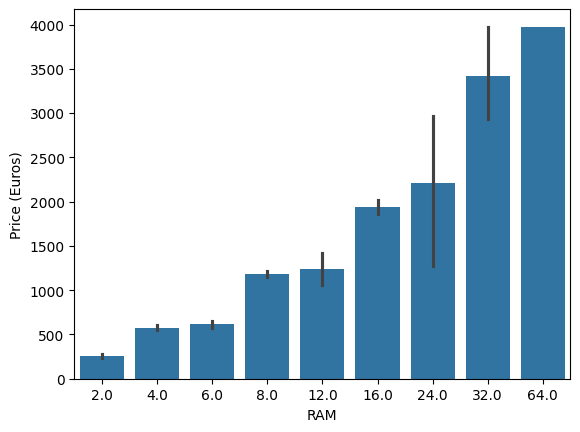

In [31]:
order = laptop_data_quantified['RAM'].sort_values(ascending=True).unique()
sns.barplot(x=laptop_data_quantified['RAM'], y=laptop_data_quantified['Price (Euros)'], order=order)

<Axes: xlabel='Screen', ylabel='Price (Euros)'>

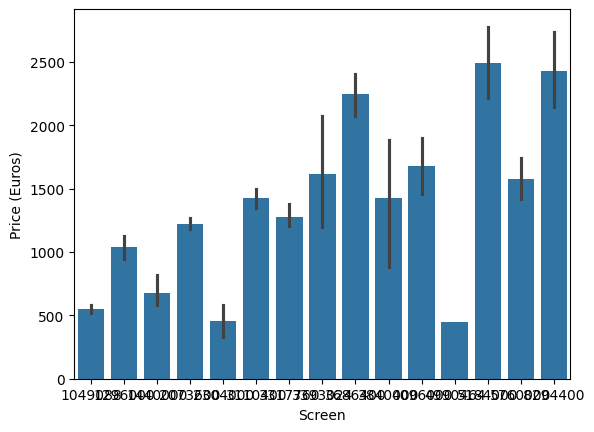

In [32]:
order_screen = laptop_data_quantified['Screen'].sort_values(ascending=True).unique()
sns.barplot(x=laptop_data_quantified['Screen'], y=laptop_data_quantified['Price (Euros)'], order=order_screen)

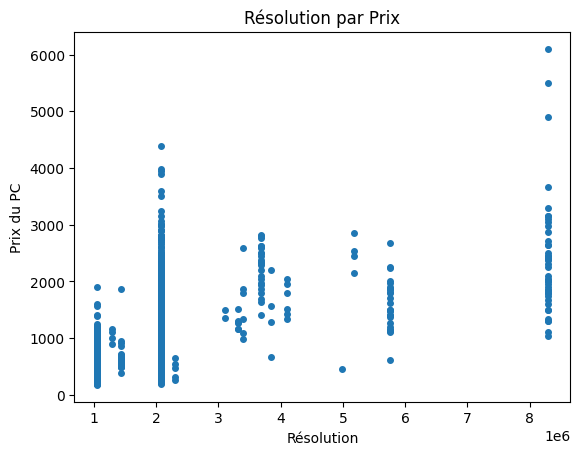

In [33]:
plt.plot(laptop_data_quantified['Screen'], laptop_data_quantified['Price (Euros)'], 'o', markersize=4)
plt.xlabel('Résolution')
plt.ylabel('Prix du PC')
plt.title('Résolution par Prix')
plt.show()

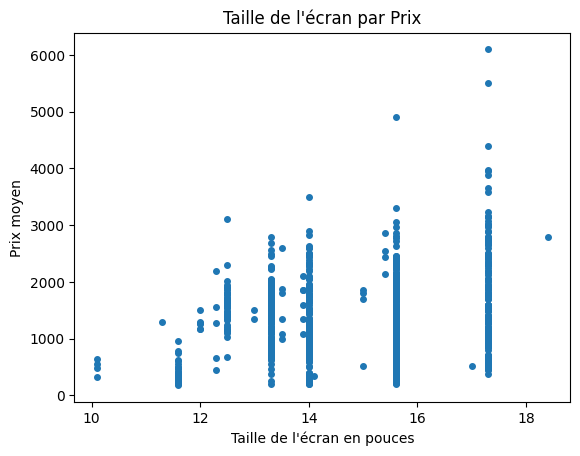

In [34]:
plt.plot(laptop_data_quantified['ScreenSize'], laptop_data_quantified['Price (Euros)'], 'o', markersize=4)
plt.xlabel('Taille de l\'écran en pouces')
plt.ylabel('Prix moyen')
plt.title('Taille de l\'écran par Prix')
plt.show()

Il y a une corrélation faible mais positive entre la taille d'écran et le prix

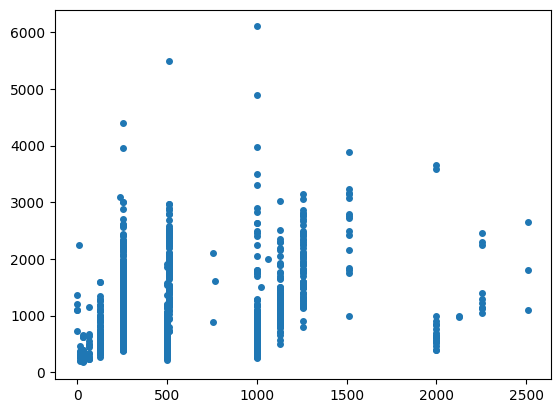

In [35]:
plt.plot(laptop_data_quantified[' Storage'], laptop_data_quantified['Price (Euros)'], 'o', markersize=4)
plt.show()

In [36]:
cov_mat = laptop_data_quantified.cov()
cov_mat

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,Price (Euros),StorageType
Manufacturer,7.572157,0.049251,-0.222225,2.754218e+05,4.131144e+00,2.082844e+00,-2.996385e+01,-6.595921e-01,0.058512,-0.108541,2.871853e+02,-0.124754
Category,0.049251,1.688446,0.262409,2.072867e+05,4.651806e+00,1.818421e+00,1.186652e+02,7.068859e+00,0.038510,0.278430,2.653955e+02,0.486870
ScreenSize,-0.222225,0.262409,2.034343,-1.714510e+05,-1.194496e+00,1.725990e+00,3.599843e+02,8.897000e+00,-0.177763,0.785562,6.799204e+01,1.313170
Screen,275421.811559,207286.676970,-171451.022029,1.935695e+12,2.120629e+06,2.803941e+06,4.235523e+07,2.141474e+06,-85203.711930,-40769.551603,5.013239e+08,45171.915304
CPU,4.131144,4.651806,-1.194496,2.120629e+06,6.915761e+02,1.342987e+01,1.706787e+01,2.402402e+02,2.808581,1.551022,2.303742e+03,4.319514
RAM,2.082844,1.818421,1.725990,2.803941e+06,1.342987e+01,2.585381e+01,8.365959e+02,2.181711e+01,-0.447664,1.298921,2.640816e+03,2.569726
Storage,-29.963853,118.665174,359.984282,4.235523e+07,1.706787e+01,8.365959e+02,2.192797e+05,2.418575e+03,-40.228454,171.360481,5.257174e+04,784.057870
GPU,-0.659592,7.068859,8.897000,2.141474e+06,2.402402e+02,2.181711e+01,2.418575e+03,4.898863e+02,0.764321,5.186396,2.157572e+03,11.378249
OperatingSystem,0.058512,0.038510,-0.177763,-8.520371e+04,2.808581e+00,-4.476636e-01,-4.022845e+01,7.643209e-01,0.618893,-0.041617,-8.320563e+01,-0.039259
Weight,-0.108541,0.278430,0.785562,-4.076955e+04,1.551022e+00,1.298921e+00,1.713605e+02,5.186396e+00,-0.041617,0.442856,9.785830e+01,0.688094


In [37]:
cor_mat = laptop_data_quantified.cov()
cor_mat

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,Price (Euros),StorageType
Manufacturer,7.572157,0.049251,-0.222225,2.754218e+05,4.131144e+00,2.082844e+00,-2.996385e+01,-6.595921e-01,0.058512,-0.108541,2.871853e+02,-0.124754
Category,0.049251,1.688446,0.262409,2.072867e+05,4.651806e+00,1.818421e+00,1.186652e+02,7.068859e+00,0.038510,0.278430,2.653955e+02,0.486870
ScreenSize,-0.222225,0.262409,2.034343,-1.714510e+05,-1.194496e+00,1.725990e+00,3.599843e+02,8.897000e+00,-0.177763,0.785562,6.799204e+01,1.313170
Screen,275421.811559,207286.676970,-171451.022029,1.935695e+12,2.120629e+06,2.803941e+06,4.235523e+07,2.141474e+06,-85203.711930,-40769.551603,5.013239e+08,45171.915304
CPU,4.131144,4.651806,-1.194496,2.120629e+06,6.915761e+02,1.342987e+01,1.706787e+01,2.402402e+02,2.808581,1.551022,2.303742e+03,4.319514
RAM,2.082844,1.818421,1.725990,2.803941e+06,1.342987e+01,2.585381e+01,8.365959e+02,2.181711e+01,-0.447664,1.298921,2.640816e+03,2.569726
Storage,-29.963853,118.665174,359.984282,4.235523e+07,1.706787e+01,8.365959e+02,2.192797e+05,2.418575e+03,-40.228454,171.360481,5.257174e+04,784.057870
GPU,-0.659592,7.068859,8.897000,2.141474e+06,2.402402e+02,2.181711e+01,2.418575e+03,4.898863e+02,0.764321,5.186396,2.157572e+03,11.378249
OperatingSystem,0.058512,0.038510,-0.177763,-8.520371e+04,2.808581e+00,-4.476636e-01,-4.022845e+01,7.643209e-01,0.618893,-0.041617,-8.320563e+01,-0.039259
Weight,-0.108541,0.278430,0.785562,-4.076955e+04,1.551022e+00,1.298921e+00,1.713605e+02,5.186396e+00,-0.041617,0.442856,9.785830e+01,0.688094


In [38]:
det_mat = cor_mat**2
det_mat

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,Price (Euros),StorageType
Manufacturer,5.733756e+01,2.425625e-03,4.938399e-02,7.585717e+10,1.706635e+01,4.338241e+00,8.978325e+02,4.350618e-01,3.423657e-03,1.178124e-02,8.247540e+04,1.556357e-02
Category,2.425625e-03,2.850848e+00,6.885859e-02,4.296777e+10,2.163930e+01,3.306655e+00,1.408142e+04,4.996876e+01,1.483045e-03,7.752341e-02,7.043475e+04,2.370425e-01
ScreenSize,4.938399e-02,6.885859e-02,4.138552e+00,2.939545e+10,1.426820e+00,2.979041e+00,1.295887e+05,7.915661e+01,3.159968e-02,6.171075e-01,4.622917e+03,1.724415e+00
Screen,7.585717e+10,4.296777e+10,2.939545e+10,3.746913e+24,4.497066e+12,7.862086e+12,1.793966e+15,4.585913e+12,7.259673e+09,1.662156e+09,2.513257e+17,2.040502e+09
CPU,1.706635e+01,2.163930e+01,1.426820e+00,4.497066e+12,4.782775e+05,1.803614e+02,2.913122e+02,5.771537e+04,7.888126e+00,2.405668e+00,5.307226e+06,1.865820e+01
RAM,4.338241e+00,3.306655e+00,2.979041e+00,7.862086e+12,1.803614e+02,6.684197e+02,6.998927e+05,4.759862e+02,2.004027e-01,1.687195e+00,6.973908e+06,6.603493e+00
Storage,8.978325e+02,1.408142e+04,1.295887e+05,1.793966e+15,2.913122e+02,6.998927e+05,4.808357e+10,5.849507e+06,1.618329e+03,2.936441e+04,2.763787e+09,6.147467e+05
GPU,4.350618e-01,4.996876e+01,7.915661e+01,4.585913e+12,5.771537e+04,4.759862e+02,5.849507e+06,2.399886e+05,5.841864e-01,2.689870e+01,4.655116e+06,1.294646e+02
OperatingSystem,3.423657e-03,1.483045e-03,3.159968e-02,7.259673e+09,7.888126e+00,2.004027e-01,1.618329e+03,5.841864e-01,3.830288e-01,1.731953e-03,6.923176e+03,1.541263e-03
Weight,1.178124e-02,7.752341e-02,6.171075e-01,1.662156e+09,2.405668e+00,1.687195e+00,2.936441e+04,2.689870e+01,1.731953e-03,1.961218e-01,9.576247e+03,4.734730e-01


<Axes: >

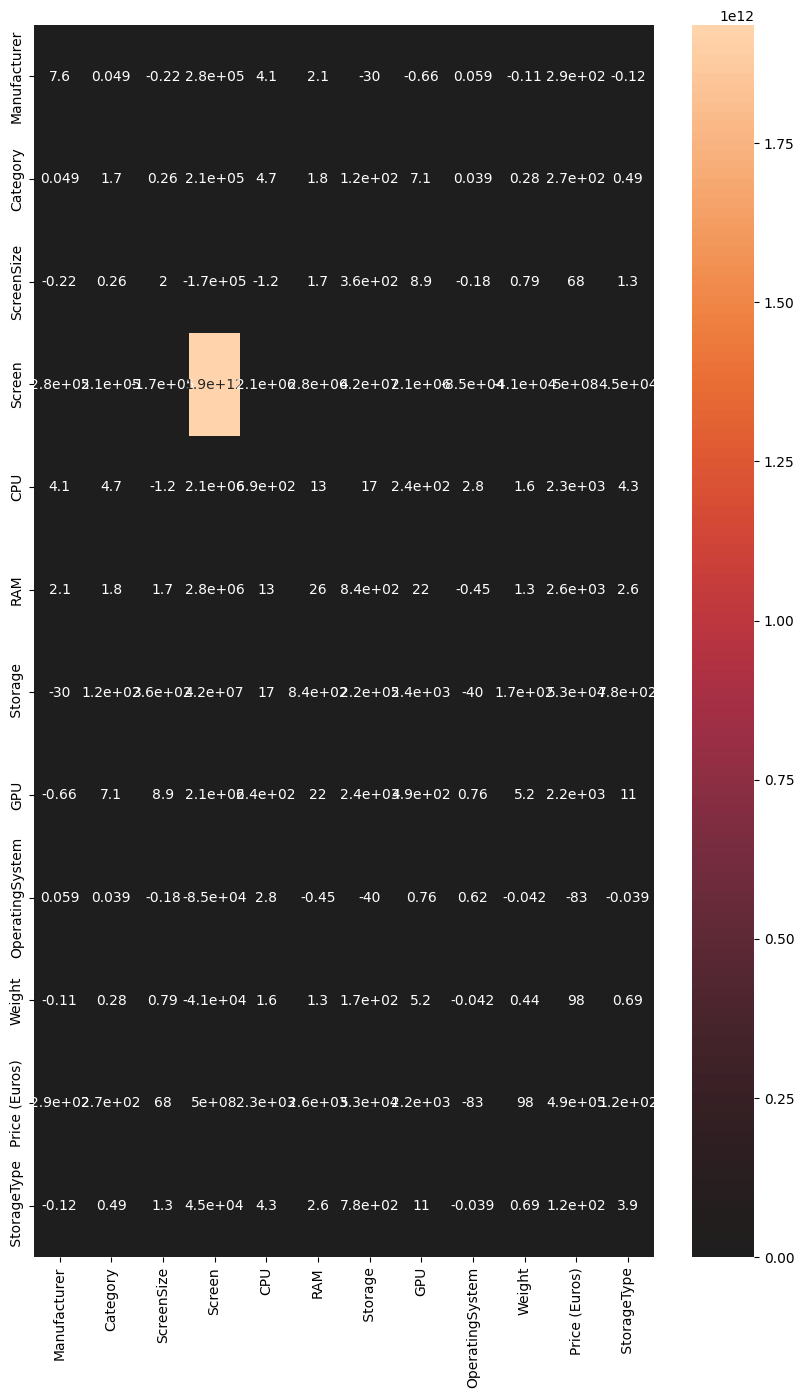

In [39]:
plt.figure(figsize=(10, 16))
sns.heatmap(cor_mat, annot=True, center=0)

<Axes: >

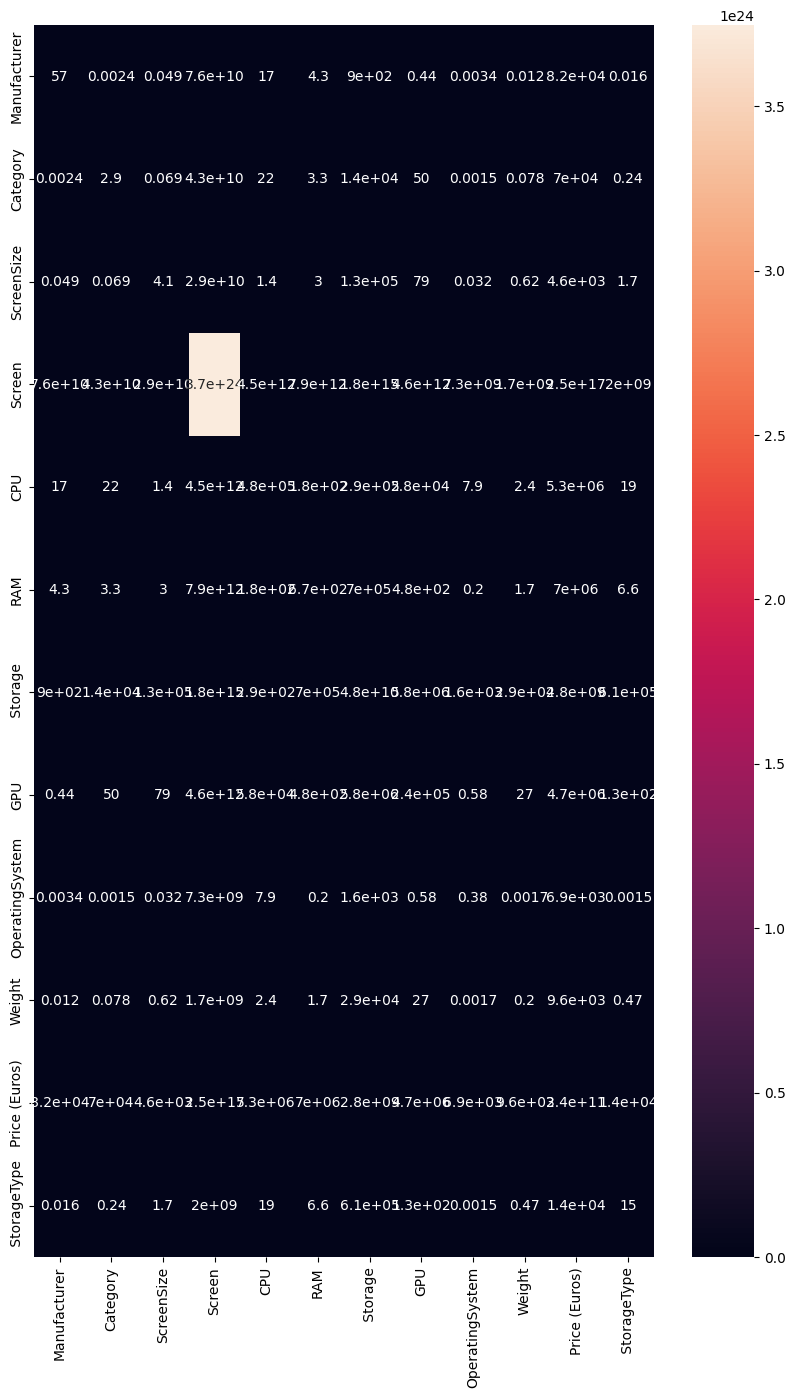

In [40]:
plt.figure(figsize=(10, 16))
sns.heatmap(det_mat,annot=True)

In [41]:
#création du tableau croisé
tab_croise = pd.crosstab(laptop_data_quantified['ScreenSize'],laptop_data_quantified[' Storage'])
print(tab_croise.head(6))

 Storage    1     8     16    32    64    128   240   256   500   508   ...  \
ScreenSize                                                              ...   
10.1           0     0     0     0     4     0     0     0     0     0  ...   
11.3           0     0     0     0     0     0     0     1     0     0  ...   
11.6           0     0     5    17     2     6     0     2     1     0  ...   
12.0           0     0     0     0     0     0     0     3     0     0  ...   
12.3           0     0     0     1     1     1     0     1     0     0  ...   
12.5           1     0     0     0     2     2     1    21     3     0  ...   

 Storage    1000  1024  1064  1128  1256  1512  2000  2128  2256  2512  
ScreenSize                                                              
10.1           0     0     0     0     0     0     0     0     0     0  
11.3           0     0     0     0     0     0     0     0     0     0  
11.6           0     0     0     0     0     0     0     0     0     0  
12

In [42]:
#test de chi2 en Python
chi2, p, dof, ex = chi2_contingency(tab_croise)
[chi2, p, dof, ex]

[1571.5224953098366,
 3.196631205563704e-146,
 374,
 array([[1.53491942e-02, 3.06983883e-03, 3.06983883e-02, 1.38142748e-01,
         4.91174213e-02, 2.48656946e-01, 3.06983883e-03, 1.28933231e+00,
         4.05218726e-01, 3.06983883e-03, 3.74520338e-01, 6.13967767e-03,
         3.06983883e-03, 7.58250192e-01, 3.06983883e-03, 3.06983883e-03,
         2.88564850e-01, 2.27168074e-01, 4.60475825e-02, 5.83269378e-02,
         6.13967767e-03, 3.06983883e-02, 9.20951650e-03],
        [3.83729854e-03, 7.67459708e-04, 7.67459708e-03, 3.45356869e-02,
         1.22793553e-02, 6.21642364e-02, 7.67459708e-04, 3.22333078e-01,
         1.01304682e-01, 7.67459708e-04, 9.36300844e-02, 1.53491942e-03,
         7.67459708e-04, 1.89562548e-01, 7.67459708e-04, 7.67459708e-04,
         7.21412126e-02, 5.67920184e-02, 1.15118956e-02, 1.45817345e-02,
         1.53491942e-03, 7.67459708e-03, 2.30237913e-03],
        [1.26630852e-01, 2.53261704e-02, 2.53261704e-01, 1.13967767e+00,
         4.05218726e-01, 2.05

In [43]:
#calcul des résidus
res_norm=(tab_croise-ex)/(ex**0.5)
res_norm

Storage,1,8,16,32,64,128,240,256,500,508,...,1000,1024,1064,1128,1256,1512,2000,2128,2256,2512
ScreenSize,,,,,,,,,,,,,,,,,,,,,
10.1,-0.123892,-0.055406,-0.175210,-0.371676,17.826921,-0.498655,-0.055406,-1.135488,-0.636568,-0.055406,...,-0.870776,-0.055406,-0.055406,-0.537182,-0.476622,-0.214587,-0.241510,-0.078356,-0.175210,-0.095966
11.3,-0.061946,-0.027703,-0.087605,-0.185838,-0.110812,-0.249328,-0.027703,1.193614,-0.318284,-0.027703,...,-0.435388,-0.027703,-0.027703,-0.268591,-0.238311,-0.107294,-0.120755,-0.039178,-0.087605,-0.047983
11.6,-0.355852,-0.159142,9.432146,14.856653,2.505281,2.756854,-0.159142,-2.648214,-1.281477,-0.159142,...,-2.501113,-0.159142,-0.159142,-1.542939,-1.368991,-0.616354,-0.693684,-0.225061,-0.503251,-0.275642
12.0,-0.151736,-0.067858,-0.214587,-0.455208,-0.271433,-0.610725,-0.067858,0.766531,-0.779633,-0.067858,...,-1.066478,-0.067858,-0.067858,-0.657911,-0.583740,-0.262814,-0.295788,-0.095966,-0.214587,-0.117534
12.3,-0.138515,-0.061946,-0.195890,1.990927,3.787994,1.236165,-0.061946,-0.481811,-0.711705,-0.061946,...,-0.973557,-0.061946,-0.061946,-0.600588,-0.532879,-0.239916,-0.270016,-0.087605,-0.195890,-0.107294
12.5,2.198114,-0.173006,-0.547092,-1.160557,2.198058,-0.272570,5.607155,2.377343,-0.478388,-0.173006,...,-2.718996,-0.173006,-0.173006,-1.677351,-1.488250,-0.670048,-0.754114,-0.244667,-0.547092,-0.299654
13.0,-0.087605,-0.039178,-0.123892,-0.262814,-0.156712,-0.352602,-0.039178,0.442557,-0.450121,-0.039178,...,-0.615731,-0.039178,-0.039178,-0.379845,-0.337022,-0.151736,-0.170773,-0.055406,-0.123892,-0.067858
13.3,0.467270,-0.354772,-0.230534,-0.699132,-1.419089,1.504898,-0.354772,5.795529,-3.094675,-0.354772,...,-3.961533,2.463937,-0.354772,-3.439645,-3.051867,-1.374027,-1.546417,-0.501724,-1.121889,-0.614484
13.5,-0.151736,-0.067858,-0.214587,-0.455208,-0.271433,2.664069,-0.067858,0.766531,-0.779633,-0.067858,...,-1.066478,-0.067858,-0.067858,-0.657911,-0.583740,-0.262814,-0.295788,-0.095966,-0.214587,-0.117534


In [44]:
contrib_chi2=100*res_norm**2/chi2
contrib_chi2

Storage,1,8,16,32,64,128,240,256,500,508,...,1000,1024,1064,1128,1256,1512,2000,2128,2256,2512
ScreenSize,,,,,,,,,,,,,,,,,,,,,
10.1,0.000977,0.000195,0.001953,0.008790,20.222372,0.015823,0.000195,0.082044,0.025785,0.000195,...,0.048249,0.000195,0.000195,0.018362,0.014455,0.002930,0.003711,0.000391,0.001953,0.000586
11.3,0.000244,0.000049,0.000488,0.002198,0.000781,0.003956,0.000049,0.090658,0.006446,0.000049,...,0.012062,0.000049,0.000049,0.004591,0.003614,0.000733,0.000928,0.000098,0.000488,0.000147
11.6,0.008058,0.001612,5.661095,14.044988,0.399385,0.483623,0.001612,0.446258,0.104496,0.001612,...,0.398058,0.001612,0.001612,0.151487,0.119256,0.024174,0.030620,0.003223,0.016116,0.004835
12.0,0.001465,0.000293,0.002930,0.013186,0.004688,0.023734,0.000293,0.037389,0.038678,0.000293,...,0.072374,0.000293,0.000293,0.027543,0.021683,0.004395,0.005567,0.000586,0.002930,0.000879
12.3,0.001221,0.000244,0.002442,0.252226,0.913057,0.097237,0.000244,0.014772,0.032231,0.000244,...,0.060312,0.000244,0.000244,0.022953,0.018069,0.003663,0.004639,0.000488,0.002442,0.000733
12.5,0.307454,0.001905,0.019046,0.085706,0.307438,0.004728,2.000620,0.359636,0.014563,0.001905,...,0.470432,0.001905,0.001905,0.179031,0.140939,0.028569,0.036187,0.003809,0.019046,0.005714
13.0,0.000488,0.000098,0.000977,0.004395,0.001563,0.007911,0.000098,0.012463,0.012893,0.000098,...,0.024125,0.000098,0.000098,0.009181,0.007228,0.001465,0.001856,0.000195,0.000977,0.000293
13.3,0.013894,0.008009,0.003382,0.031103,0.128144,0.144110,0.008009,2.137301,0.609410,0.008009,...,0.998633,0.386312,0.008009,0.752847,0.592667,0.120135,0.152171,0.016018,0.080090,0.024027
13.5,0.001465,0.000293,0.002930,0.013186,0.004688,0.451617,0.000293,0.037389,0.038678,0.000293,...,0.072374,0.000293,0.000293,0.027543,0.021683,0.004395,0.005567,0.000586,0.002930,0.000879


In [45]:
#calcul Cramer
cramer=(chi2/(laptop_data_quantified.shape[0]*(min((tab_croise.shape[0]-1),(tab_croise.shape[1]-1)))))**0.5
cramer

0.266356704212273

In [46]:
#on créée un object PCA :
pca = PCA(n_components=4)

#on l'applique sur les données normalisées et on stocke le résultat dans la variable iris_pca.
iris_pca = pca.fit_transform(iris_cr[feat_names])

NameError: name 'PCA' is not defined

# Partie 3 : création du modèle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

Séparation du dataset d'entrainement et du dataset de test, avec 20% des données alloués au test

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(laptop_data_quantified[["Manufacturer", "Category", "ScreenSize", "Screen", "CPU", "RAM", " Storage", "GPU", "OperatingSystem", "Weight", " StorageType"]], laptop_data_quantified[["Price (Euros)"]], test_size=1)

In [ ]:
regression = LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytrain.iloc[0]

Price (Euros)    1224.0
Name: 506, dtype: float64

In [ ]:
# Faire une prédiction
Manufacturer = [[1]]
Category = [[2]]
ScreenSize = [[10.7]]
Screen = [[2073600]]
CPU = [[10]]
RAM= [[2.0]]
Storage= [[250]]
GPU = [[3]]
Operatingsystem= [[3]]
Weight= [[2.0]]
StorageType= [[4]]

X_pred = np.column_stack((Manufacturer, Category, ScreenSize, Screen, CPU, RAM, Storage, GPU, Operatingsystem, Weight, StorageType))

prix_predit = regression.predict(X_pred)

C:\Users\Louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print (prix_predit)

[[665.51225093]]


In [ ]:
print(regression.intercept_)

[763.95940246]


In [ ]:
print (regression.coef_)

[[ 8.86247638e+00  5.45934563e+01 -4.39678141e+01  1.22726287e-04
   1.24834826e+00  8.58430623e+01 -5.24860296e-02 -4.11443986e-01
  -7.70142938e+01  7.82467096e+01 -2.39476161e+01]]


In [ ]:
xtrain.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,StorageType
506,4,2,15.6,2073600,13,8.0,1256,3,3,2.00,5
449,9,1,13.5,3393024,69,16.0,512,1,3,1.25,1
1084,5,2,15.6,2073600,3,8.0,256,3,3,2.18,1
568,6,2,15.6,2073600,29,4.0,500,43,3,2.20,3
340,5,2,15.6,1049088,31,4.0,500,21,5,2.20,3


In [ ]:
final_pred = lr.predict(xtest)
r2_score(final_pred, ytest["Price (Euros)"])


NameError: name 'lr' is not defined